<a href="https://colab.research.google.com/github/iannstronaut/PCVK_Ganjil_24-25/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Fungsi Dilasi Manual

In [3]:
def dilasi_manual(image):
    # Ambil dimensi gambar
    height, width = image.shape

    # Buat gambar hasil dilasi (diinisialisasi dengan nol / hitam)
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Definisikan Structuring Element (cross 3x3)
    cross = np.array([[0, 1, 0],
                      [1, 1, 1],
                      [0, 1, 0]], dtype=np.uint8)

    # Lakukan dilasi manual
    for i in range(1, height-1):
        for j in range(1, width-1):
            if image[i, j] == 255:  # Jika piksel putih (foreground)
                # Terapkan Structuring Element (cross)
                dilated_image[i-1, j] = 255 if cross[0, 1] == 1 else 0  # Atas
                dilated_image[i+1, j] = 255 if cross[2, 1] == 1 else 0  # Bawah
                dilated_image[i, j-1] = 255 if cross[1, 0] == 1 else 0  # Kiri
                dilated_image[i, j+1] = 255 if cross[1, 2] == 1 else 0  # Kanan
                dilated_image[i, j] = 255   # Pusat

    return dilated_image

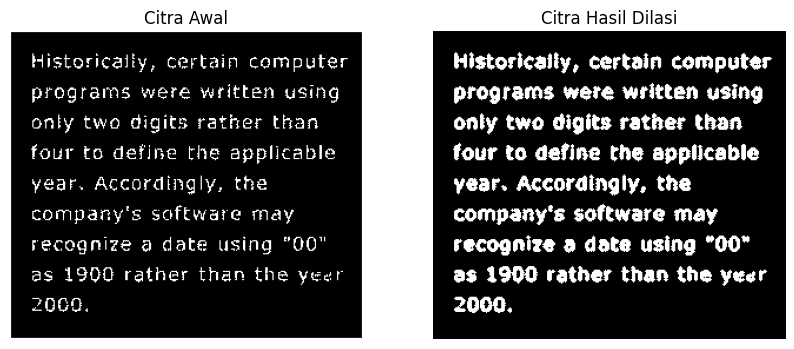

In [7]:
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/morphology.png', cv2.IMREAD_GRAYSCALE)

# Konversi gambar ke biner
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Panggil fungsi dilasi manual
dilated_image = dilasi_manual(binary_image)

# Plot hasil
plt.figure(figsize=(10, 5))

# Plot gambar asli
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Plot hasil dilasi
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

## Dilasi Menggunakan OpenCV

Structuring Element (cross 3x3):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


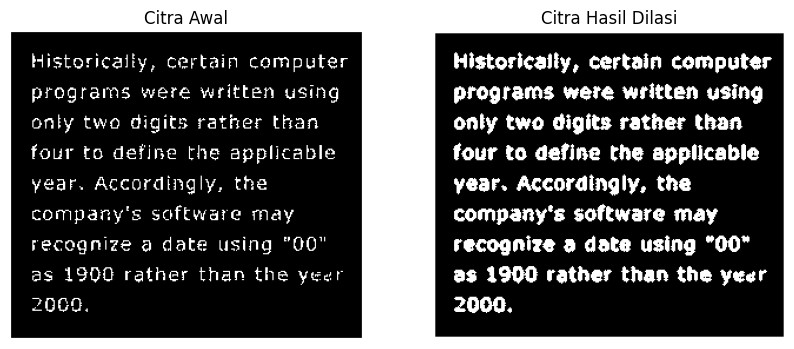

In [8]:
# Definisikan Structuring Element (cross 3x3)
structuring_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Cetak Structuring Element
print("Structuring Element (cross 3x3):\n", structuring_element)

# Lakukan dilasi menggunakan Structuring Element
dilated_image = cv2.dilate(binary_image, structuring_element)

# Plot hasil
plt.figure(figsize=(10, 5))

# Plot gambar asli
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Plot hasil dilasi
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

## Fungsi Erosi Manual

In [6]:
def erosi_manual(image):
    # Ambil dimensi gambar
    height, width = image.shape

    # Buat gambar hasil erosi (diinisialisasi dengan nilai 255 / putih)
    eroded_image = np.ones((height, width), dtype=np.uint8) * 255

    # Definisikan Structuring Element (square 5x5)
    se_size = 5
    offset = se_size // 2

    # Lakukan erosi manual
    for i in range(offset, height - offset):
        for j in range(offset, width - offset):
            # Ambil area dari SE (5x5) di sekitar piksel
            region = image[i - offset:i + offset + 1, j - offset:j + offset + 1]

            # Jika ada satu piksel yang hitam (background) di dalam SE, maka piksel pusat jadi hitam
            if np.any(region == 0):
                eroded_image[i, j] = 0

    return eroded_image


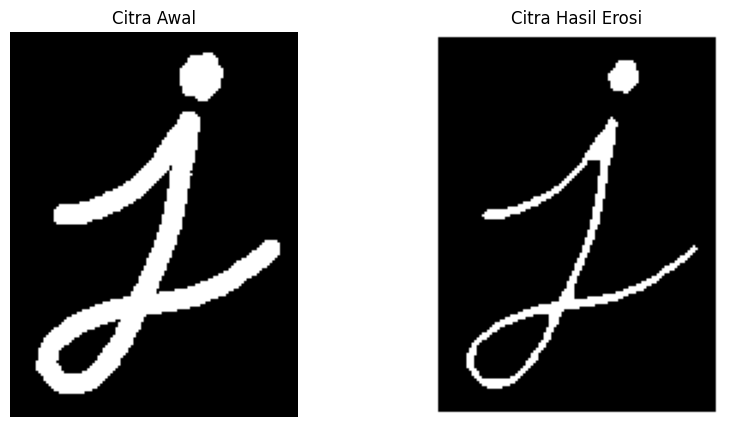

In [9]:
image_j = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Konversi gambar ke biner
_, binary_image = cv2.threshold(image_j, 128, 255, cv2.THRESH_BINARY)

# Panggil fungsi erosi manual
eroded_image = erosi_manual(binary_image)

# Plot hasil
plt.figure(figsize=(10, 5))

# Plot gambar asli
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Plot hasil erosi
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

## Erosi Menggunakan OpenCV

Structuring Element (square 5x5):
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


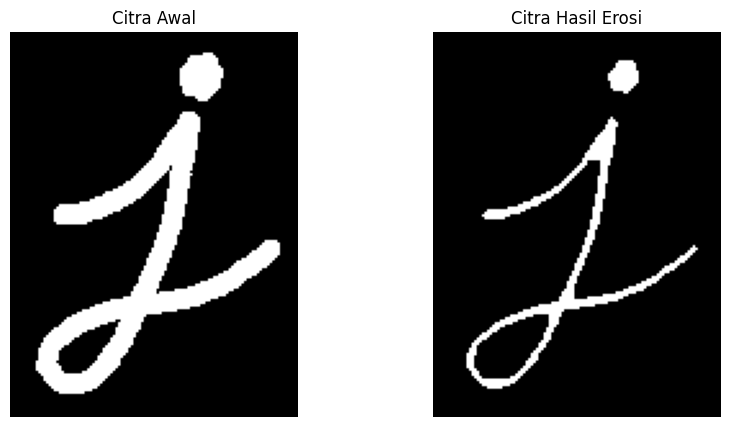

In [11]:
_, binary_image = cv2.threshold(image_j, 128, 255, cv2.THRESH_BINARY)

# Definisikan Structuring Element (square 5x5)
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Cetak Structuring Element
print("Structuring Element (square 5x5):\n", structuring_element)

# Lakukan erosi menggunakan Structuring Element
eroded_image = cv2.erode(binary_image, structuring_element)

# Plot hasil
plt.figure(figsize=(10, 5))

# Plot gambar asli
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Plot hasil erosi
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

## Fungsi Opening dengan Structuring Element Manual

In [19]:
def erosi_manual(image, se):
    height, width = image.shape
    se_size = se.shape[0]
    offset = se_size // 2
    eroded_image = np.ones((height, width), dtype=np.uint8) * 255

    for i in range(offset, height - offset):
        for j in range(offset, width - offset):
            region = image[i - offset:i + offset + 1, j - offset:j + offset + 1]
            if np.all(region == 255):
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = 0

    return eroded_image

In [20]:
# Baca gambar dari file
image_finger = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Konversi gambar ke biner
_, binary_image = cv2.threshold(image_finger, 128, 255, cv2.THRESH_BINARY)

# Definisikan Structuring Element (square 3x3)
structuring_element = np.ones((3, 3), dtype=np.uint8)

# Panggil fungsi opening manual
opened_manual = erosi_manual(binary_image, structuring_element)

## Opening dengan SE menggunakan OpenCV

In [21]:
# Definisikan Structuring Element (square 3x3)
structuring_element_CV = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Lakukan opening menggunakan fungsi morphologyEx dari OpenCV
opened_image_CV = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, structuring_element)

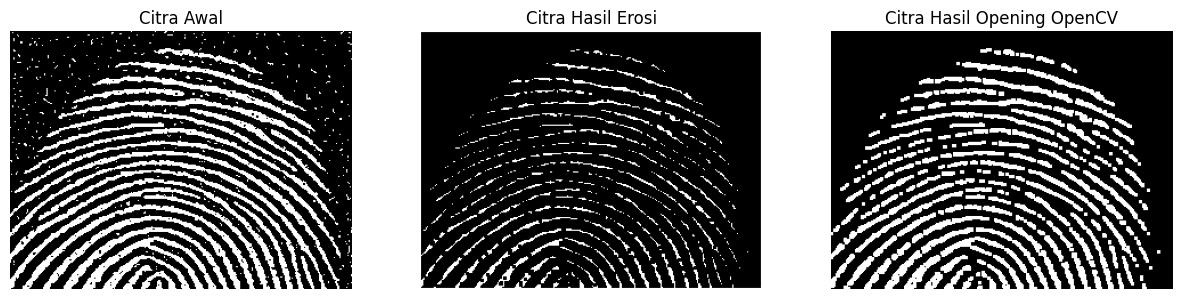

In [22]:
# Plot hasil
plt.figure(figsize=(15, 5))

# Plot gambar asli
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Plot hasil opening manual
plt.subplot(1, 3, 2)
plt.imshow(opened_manual, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

# Plot hasil opening menggunakan OpenCV
plt.subplot(1, 3, 3)
plt.imshow(opened_image_CV, cmap='gray')
plt.title('Citra Hasil Opening OpenCV')
plt.axis('off')

plt.show()

## Fungsi Closing dengan Structuring Element Manual

In [26]:
def dilasi_manual(image, se):
    height, width = image.shape
    se_size = se.shape[0]
    offset = se_size // 2
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    for i in range(offset, height - offset):
        for j in range(offset, width - offset):
            region = image[i - offset:i + offset + 1, j - offset:j + offset + 1]
            if np.any(region == 255):
                dilated_image[i, j] = 255
            else:
                dilated_image[i, j] = 0

    return dilated_image

In [27]:
# Panggil fungsi closing manual
closed_manual = dilasi_manual(binary_image, structuring_element)

## Closing dengan SE menggunakan OpenCV

In [28]:
closed_image_cv = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, structuring_element)

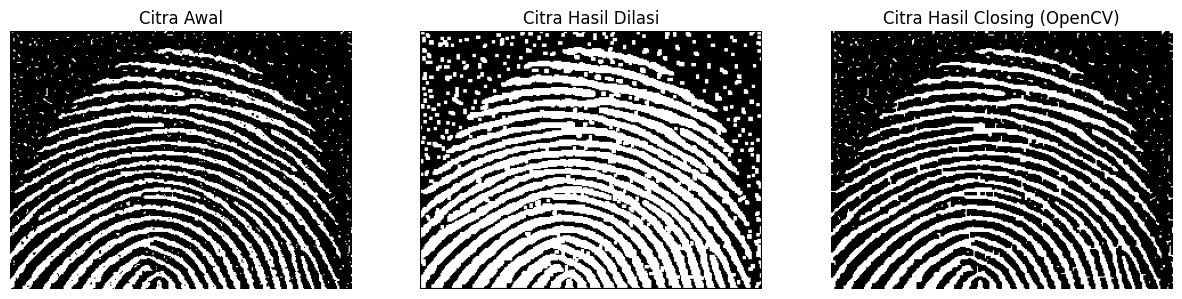

In [30]:
plt.figure(figsize=(15, 5))

# Plot gambar asli
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Plot hasil closing manual
plt.subplot(1, 3, 2)
plt.imshow(closed_manual, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

# Plot hasil closing menggunakan OpenCV
plt.subplot(1, 3, 3)
plt.imshow(closed_image_cv, cmap='gray')
plt.title('Citra Hasil Closing (OpenCV)')
plt.axis('off')

plt.show()

## Dilasi Cross dengan SE 3x3 dan 5x5

In [4]:
def create_cross_se(size):
    se = np.zeros((size, size), dtype=np.uint8)
    center = size // 2
    se[:, center] = 1  # Garis vertikal
    se[center, :] = 1  # Garis horizontal
    return se

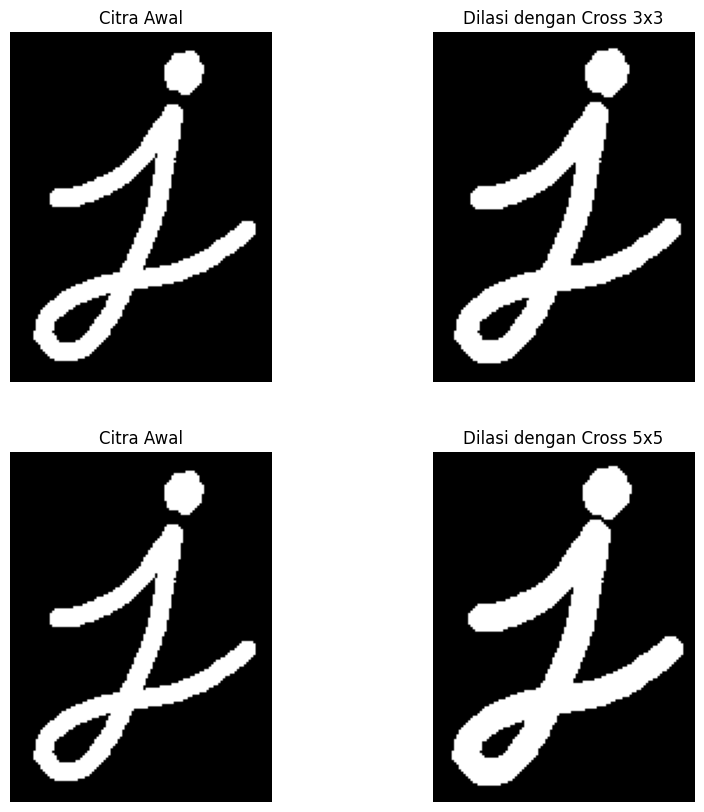

In [5]:
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Konversi gambar ke biner
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Structuring Element Cross 3x3 dan 5x5
cross_3x3 = create_cross_se(3)
cross_5x5 = create_cross_se(5)

# Lakukan operasi dilasi menggunakan OpenCV
dilated_3x3 = cv2.dilate(binary_image, cross_3x3)
dilated_5x5 = cv2.dilate(binary_image, cross_5x5)

# Plot hasil dilasi
plt.figure(figsize=(10, 10))

# Plot gambar asli
plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Plot hasil dilasi dengan Structuring Element Cross 3x3
plt.subplot(2, 2, 2)
plt.imshow(dilated_3x3, cmap='gray')
plt.title('Dilasi dengan Cross 3x3')
plt.axis('off')

# Plot gambar asli
plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')
# Plot hasil dilasi dengan Structuring Element Cross 5x5
plt.subplot(2, 2, 4)
plt.imshow(dilated_5x5, cmap='gray')
plt.title('Dilasi dengan Cross 5x5')
plt.axis('off')

plt.show()

## Dilasi Circular dengan SE 3x3 dan 5x5

In [2]:
def create_circular_se(size):
    se = np.zeros((size, size), dtype=np.uint8)
    center = size // 2
    radius = size // 2
    for i in range(size):
        for j in range(size):
            # Memeriksa apakah (i, j) berada dalam lingkaran dengan radius tertentu
            if (i - center) ** 2 + (j - center) ** 2 <= radius ** 2:
                se[i, j] = 1
    return se

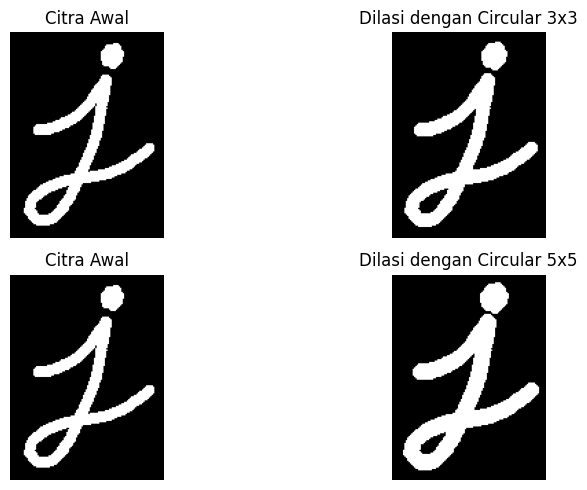

In [6]:
circular_3x3 = create_circular_se(3)
circular_5x5 = create_circular_se(5)

# Lakukan operasi dilasi menggunakan OpenCV
dilated_3x3 = cv2.dilate(binary_image, circular_3x3)
dilated_5x5 = cv2.dilate(binary_image, circular_5x5)

# Plot hasil dilasi
plt.figure(figsize=(10, 5))

# Baris 1: Gambar asli dan dilasi dengan Circular 3x3
plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated_3x3, cmap='gray')
plt.title('Dilasi dengan Circular 3x3')
plt.axis('off')

# Baris 2: Gambar asli dan dilasi dengan Circular 5x5
plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dilated_5x5, cmap='gray')
plt.title('Dilasi dengan Circular 5x5')
plt.axis('off')

plt.tight_layout()
plt.show()

## Erosi Rectengular dengan SE 3x5 dan 5x7

In [7]:
rectangular_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
rectangular_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

# Lakukan operasi erosi menggunakan OpenCV
eroded_3x5 = cv2.erode(binary_image, rectangular_3x5)
eroded_5x7 = cv2.erode(binary_image, rectangular_5x7)

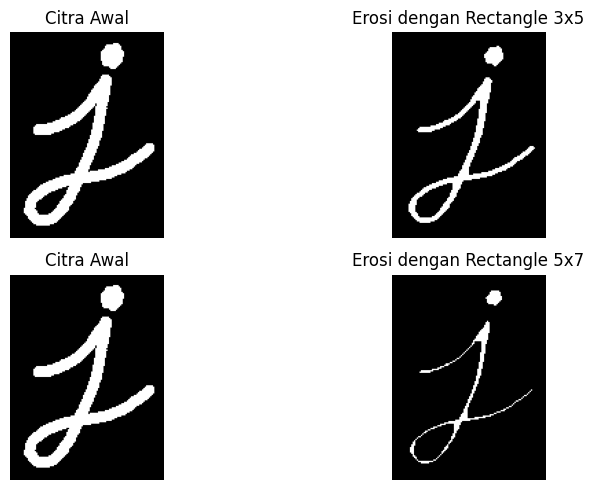

In [8]:
plt.figure(figsize=(10, 5))

# Baris 1: Gambar asli dan erosi dengan Rectangle 3x5
plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_3x5, cmap='gray')
plt.title('Erosi dengan Rectangle 3x5')
plt.axis('off')

# Baris 2: Gambar asli dan erosi dengan Rectangle 5x7
plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_5x7, cmap='gray')
plt.title('Erosi dengan Rectangle 5x7')
plt.axis('off')

plt.tight_layout()
plt.show()

## Erosi Line Vertikal dengan SE 3 dan 5

In [9]:
vertical_line_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))  # 1 kolom, 3 baris
vertical_line_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))  # 1 kolom, 5 baris

# Lakukan operasi erosi menggunakan OpenCV
eroded_3 = cv2.erode(binary_image, vertical_line_3)
eroded_5 = cv2.erode(binary_image, vertical_line_5)

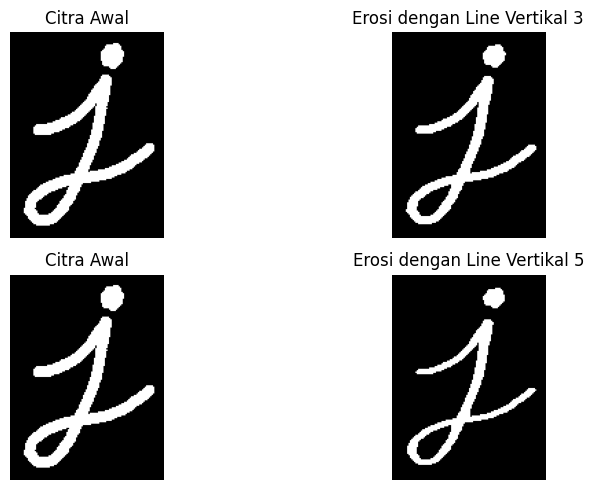

In [10]:
plt.figure(figsize=(10, 5))

# Baris 1: Gambar asli dan erosi dengan Line Vertikal 3
plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_3, cmap='gray')
plt.title('Erosi dengan Line Vertikal 3')
plt.axis('off')

# Baris 2: Gambar asli dan erosi dengan Line Vertikal 5
plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_5, cmap='gray')
plt.title('Erosi dengan Line Vertikal 5')
plt.axis('off')

plt.tight_layout()
plt.show()